<a href="https://colab.research.google.com/github/MinhNhatP/learningAI/blob/main/HandWritingEx_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Trần Tuấn Kiệt
# Phan Minh Nhật

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the MNIST dataset
x_train = np.reshape(x_train, (60000,784))/255.0
x_test = np.reshape(x_test, (10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])

# Input 784 nodes (28x28 pixel)
print(x_train.shape)

# 10 output nodes represent digital numbers ranging from 0 to 9.
print(y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 784)
(60000, 10)


In [ ]:
# Define active function.
def relu(x):
    return (np.maximum(x, 0))
def sigmoid(x):
    return 1./(1.+np.exp(-x))
def softmax(x):
    return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))
def gradient_relu(x):
  temp = x
  temp[temp >= 0] = 1
  temp[temp < 0] = 0
  return temp


In [ ]:
def dropOutMask(node, probability):
  temp = np.random.choice(2, (200,512), p = [probability, 1-probability])
  return temp*0.5

In [ ]:
def Forwardpass(X,Wh1,bh1,Wh2,bh2,Wo,bo):
    zh1 = X@Wh1.T + bh1
    a = sigmoid(zh1) # output of layer 1
    
    zh2 = a@Wh2.T + bh2 
    b = sigmoid(zh2) # output of layer 2
    
    z = b@Wo.T + bo
    o = softmax(z)
    return o

def AccTest(label,prediction): # calculate the matching score
    OutMaxArg = np.argmax(prediction,axis=1)
    LabelMaxArg = np.argmax(label,axis=1)
    Accuracy = np.mean(OutMaxArg == LabelMaxArg)
    return Accuracy

In [ ]:
learningRate = 0.5
Epoch = 10
NumTrainSamples = 60000
NumTestSamples = 10000
NumInputs = 784
NumHiddenUnits = 512
NumClasses = 10

#inital weights

#hidden layer 1
Wh1 = np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh1 = np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh1 = np.zeros((NumHiddenUnits,NumInputs))
dbh1 = np.zeros((1,NumHiddenUnits))

print(np.shape(Wh1))


#hidden layer 2
Wh2 = np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumHiddenUnits)))
bh2 = np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh2 = np.zeros((NumHiddenUnits,NumHiddenUnits))
dbh2 = np.zeros((1,NumHiddenUnits))

print(np.shape(Wh2))

#Output layer
Wo = np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bo = np.random.uniform(0,0.5,(1,NumClasses))
dWo = np.zeros((NumClasses,NumHiddenUnits))
dbo = np.zeros((1,NumClasses))

print(np.shape(Wo))

(512, 784)
(512, 512)
(10, 512)


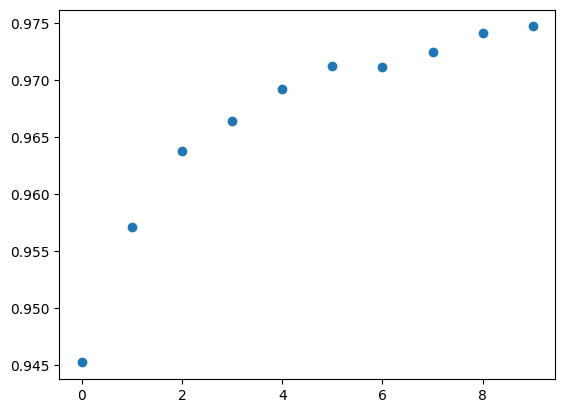

In [ ]:
#adaptive
from IPython.display import clear_output

Epoch = 10
Batch_size = 200
learningRate = 0.01
epsilon = 1e-8  # small value added to denominator for numerical stability

loss = []
Acc = []

# Initialize the gradients and the accumulated gradient squared values for all weights and biases to zero
grad_squared_sum_Wh1 = 0
grad_squared_sum_bh1 = 0
grad_squared_sum_Wh2 = 0
grad_squared_sum_bh2 = 0
grad_squared_sum_Wo = 0
grad_squared_sum_bo = 0

Stochastic_samples = np.arange(NumTrainSamples)

for ep in range(Epoch):
    
    np.random.shuffle(Stochastic_samples)
    
    for ite in range(0, NumTrainSamples, Batch_size):
        
        #feed forward propagation
        Batch_samples = Stochastic_samples[ite:ite+Batch_size]
        x = x_train[Batch_samples,:]
        y = y_train[Batch_samples,:]
        
        zh1 = x @ Wh1.T + bh1
        a = sigmoid(zh1)

        zh2 = a @ Wh2.T + bh2
        b = sigmoid(zh2)

        z = b @ Wo.T + bo
        o = softmax(z)

        #calculate loss
        loss.append(-np.sum(np.multiply(y, np.log10(o))))
        
        #calculate the error for the output layer
        d = o - y
        
        #back propagate error
        dh2 = d @ Wo
        dhs2 = np.multiply(np.multiply(dh2, b), (1 - b))

        dh1 = dhs2 @ Wh2
        dhs1 = np.multiply(np.multiply(dh1, a), (1 - a))

        #calculate gradients
        dWo = np.matmul(np.transpose(d), b)
        dbo = np.mean(d, axis=0)

        dWh2 = np.matmul(np.transpose(dhs2), a)
        dbh2 = np.mean(dhs2, axis=0)

        dWh1 = np.matmul(np.transpose(dhs1), x)
        dbh1 = np.mean(dhs1, axis=0)

        #accumulate the square of the gradients for each weight and bias
        grad_squared_sum_Wh1 += np.square(dWh1)
        grad_squared_sum_bh1 += np.square(dbh1)
        grad_squared_sum_Wh2 += np.square(dWh2)
        grad_squared_sum_bh2 += np.square(dbh2)
        grad_squared_sum_Wo += np.square(dWo)
        grad_squared_sum_bo += np.square(dbo)

        #update weights and biases using Adagrad
        Wo -= learningRate * dWo / (np.sqrt(grad_squared_sum_Wo) + epsilon)
        bo -= learningRate * dbo / (np.sqrt(grad_squared_sum_bo) + epsilon)
        Wh2 -= learningRate * dWh2 / (np.sqrt(grad_squared_sum_Wh2) + epsilon)
        bh2 -= learningRate * dbh2 / (np.sqrt(grad_squared_sum_bh2) + epsilon)
        Wh1 -= learningRate * dWh1 / (np.sqrt(grad_squared_sum_Wh1) + epsilon)
        bh1 -= learningRate * dbh1 / (np.sqrt(grad_squared_sum_bh1) + epsilon)
    
      #Test accuracy with random innitial weights
    prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
    Acc.append(AccTest(y_test,prediction))
    clear_output(wait=True)
    plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
    plt.show()

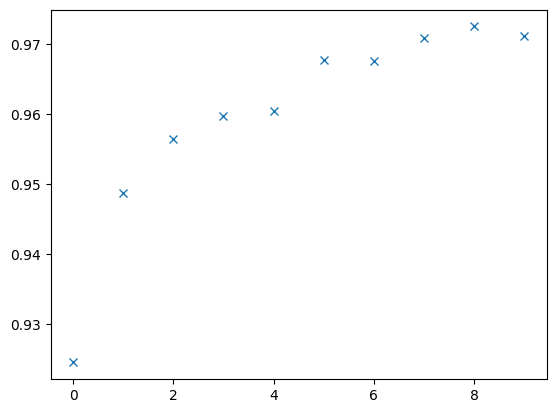

In [ ]:
# momentum
from IPython.display import clear_output
Epoch = 10
loss = []
Acc = []
Batch_size = 200
Stochastic_samples = np.arange(NumTrainSamples)
learningRate = 0.9

dWo_Before = dWo.copy()
dWh1_Before = dWh1.copy()
dWh2_Before = dWh2.copy()
dbo_Before = dbo.copy()
dbh1_Before = dbh1.copy()
dbh2_Before = dbh2.copy()

for ep in range (Epoch):
  np.random.shuffle(Stochastic_samples)
  for ite in range(0,NumTrainSamples,Batch_size): 
    #feed fordware propagation
    Batch_samples = Stochastic_samples[ite:ite+Batch_size]
    x = x_train[Batch_samples,:]
    y = y_train[Batch_samples,:]

    zh1 = x@Wh1.T + bh1
    a = sigmoid(zh1)

    zh2 = a@Wh2.T + bh2
    b = sigmoid(zh2)

    z = b@Wo.T + bo
    o = softmax(z)

    #calculate loss
    loss.append(-np.sum(np.multiply(y,np.log10(o))))
    #calculate the error for the ouput layer
    d = o-y
    #Back propagate error
    dh2 = d@Wo
    dhs2 = np.multiply(np.multiply(dh2,b),(1-b))

    dh1 = dhs2@Wh2
    dhs1 = np.multiply(np.multiply(dh1,a),(1-a))
       
    # Update weight 
    dWo = np.matmul(np.transpose(d),b)
    dbo = np.mean(d) 

    dWh2 = np.matmul(np.transpose(dhs2),a)
    dbh2 = np.mean(dhs1)
    dWh1 = np.matmul(np.transpose(dhs1),x)
    dbh1 = np.mean(dhs2) # consider a is 1 for bias

    #update weights and biases using momentum
    Wo = Wo - (learningRate*dWo+dWo_Before*0.9)/Batch_size
    bo = bo - (learningRate* dbo+0.9*dbo_Before)
    Wh2 = Wh2 - (learningRate*dWh2+dWh2_Before*0.9)/Batch_size
    bh2 = bh2 - (learningRate*dbh2+0.9*dbh2_Before)
    Wh1 = Wh1 - (learningRate*dWh1+dWh1_Before*0.9)/Batch_size
    bh1 = bh1 - (learningRate*dbh1+0.9*dbh1_Before)
    #Test accuracy with random innitial weights
  prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
  Acc.append(AccTest(y_test,prediction))
  clear_output(wait=True)
  plt.plot([i for i, _ in enumerate(Acc)],Acc,'x')
  plt.show()

In [ ]:
prediction = Forwardpass(x_test,Wh1,bh1,Wh2, bh2, Wo,bo)
Rate = AccTest(y_test, prediction)
print(Rate)

0.9785


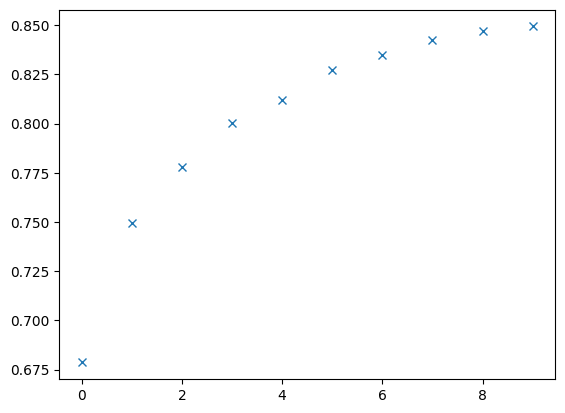

In [ ]:
#dropout
from traitlets.traitlets import Undefined
from IPython.display import clear_output
Epoch = 10
loss = []
Acc = []
learningRate = 0.1
Batch_size = 200
dropOutProp = 0.5
Stochastic_samples = np.arange(NumTrainSamples)
for ep in range (Epoch):
  np.random.shuffle(Stochastic_samples)
  for ite in range(0,NumTrainSamples,Batch_size): 
    #making mask
    a_mask = dropOutMask((200,512), dropOutProp)
    b_mask = dropOutMask((200,512), dropOutProp)
    #feed fordware propagation
    Batch_samples = Stochastic_samples[ite:ite+Batch_size]
    x = x_train[Batch_samples,:]
    y = y_train[Batch_samples,:]

    zh1 = x@Wh1.T + bh1
    a_temp = sigmoid(zh1)
    a = np.multiply(a_mask,a_temp)  #update mask

    zh2 = a@Wh2.T + bh2
    b_temp = sigmoid(zh2)
    b = np.multiply(b_mask,b_temp)  #update mask

    z = b@Wo.T + bo
    o = softmax(z)

    #calculate loss
    loss.append(-np.sum(np.multiply(y,np.log10(o))))
    #calculate the error for the ouput layer
    d = o-y
    #Back propagate error
    dh2 = d@Wo
    dhs2 = np.multiply(np.multiply(dh2,b),(1-b))

    dh1 = dhs2@Wh2
    dhs1 = np.multiply(np.multiply(dh1,a),(1-a))
       
    # Update weight 
    dWo = np.matmul(np.transpose(d),b)
    dbo = np.mean(d) 

    dWh2 = np.matmul(np.transpose(dhs2),a)
    dbh2 = np.mean(dhs1)
    dWh1= np.matmul(np.transpose(dhs1),x)
    dbh1= np.mean(dhs2) # consider a is 1 for bias
    Wo = Wo - learningRate * dWo / Batch_size
    bo = bo - learningRate * dbo

    Wh2 = Wh2 - learningRate * dWh2 / Batch_size
    bh2 = bh2 - learningRate * dbh2

    Wh1 = Wh1 - learningRate * dWh1 / Batch_size
    bh1 = bh1 - learningRate * dbh1
    #Test accuracy with random innitial weights
  prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
  Acc.append(AccTest(y_test,prediction))
  clear_output(wait=True)
  plt.plot([i for i, _ in enumerate(Acc)],Acc,'x')
  plt.show()

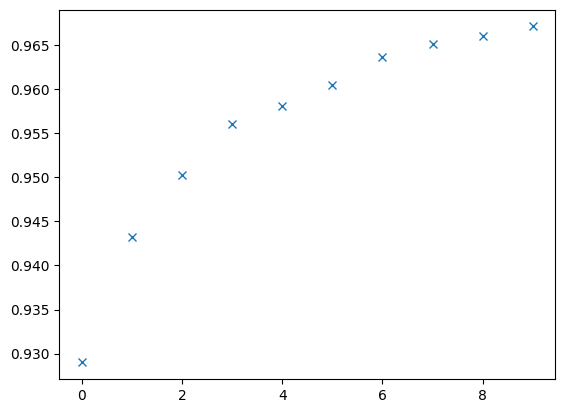

In [ ]:
# 2 sigmoid
from IPython.display import clear_output
Epoch = 10
loss = []
Acc = []
Batch_size = 200
Stochastic_samples = np.arange(NumTrainSamples)
for ep in range (Epoch):
  np.random.shuffle(Stochastic_samples)
  for ite in range(0,NumTrainSamples,Batch_size): 
    #feed fordware propagation
    Batch_samples = Stochastic_samples[ite:ite+Batch_size]
    x = x_train[Batch_samples,:]
    y = y_train[Batch_samples,:]

    zh1 = x@Wh1.T + bh1
    a = sigmoid(zh1)

    zh2 = a@Wh2.T + bh2
    b = sigmoid(zh2)

    z = b@Wo.T + bo
    o = softmax(z)

    #calculate loss
    loss.append(-np.sum(np.multiply(y,np.log10(o))))
    #calculate the error for the ouput layer
    d = o-y
    #Back propagate error
    dh2 = d@Wo
    dhs2 = np.multiply(np.multiply(dh2,b),(1-b))

    dh1 = dhs2@Wh2
    dhs1 = np.multiply(np.multiply(dh1,a),(1-a))
       
    # Update weight 
    dWo = np.matmul(np.transpose(d),b)
    dbo = np.mean(d) 

    dWh2 = np.matmul(np.transpose(dhs2),a)
    dbh2 = np.mean(dhs1)
    dWh1= np.matmul(np.transpose(dhs1),x)
    dbh1= np.mean(dhs2) # consider a is 1 for bias
    Wo = Wo - learningRate * dWo / Batch_size
    bo = bo - learningRate * dbo

    Wh2 = Wh2 - learningRate * dWh2 / Batch_size
    bh2 = bh2 - learningRate * dbh2

    Wh1 = Wh1 - learningRate * dWh1 / Batch_size
    bh1 = bh1 - learningRate * dbh1
    #Test accuracy with random innitial weights
  prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
  Acc.append(AccTest(y_test,prediction))
  clear_output(wait=True)
  plt.plot([i for i, _ in enumerate(Acc)],Acc,'x')
  plt.show()

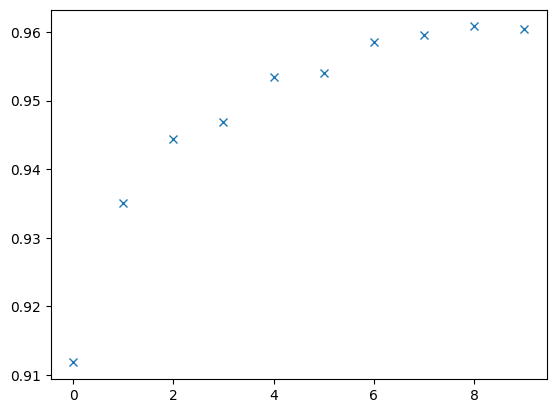

In [ ]:
# 1 relu & 1 sigmoid
from IPython.display import clear_output
Epoch = 10
loss = []
Acc = []
Batch_size = 200
Stochastic_samples = np.arange(NumTrainSamples)
for ep in range (Epoch):
  np.random.shuffle(Stochastic_samples)
  for ite in range(0,NumTrainSamples,Batch_size): 
    #feed fordware propagation
    Batch_samples = Stochastic_samples[ite:ite+Batch_size]
    x = x_train[Batch_samples,:]
    y=y_train[Batch_samples,:]

    zh1 = x@Wh1.T + bh1
    a = sigmoid(zh1)

    zh2 = a@Wh2.T + bh2
    b = relu(zh2)

    z = b@Wo.T + bo
    o = softmax(z)

    #calculate loss
    loss.append(-np.sum(np.multiply(y,np.log10(o))))
    #calculate the error for the ouput layer
    d = o-y
    #Back propagate error
    dh2 = d@Wo
    dhs2 = np.multiply(np.multiply(dh2,b),(1-b))

    dh1 = dhs2@Wh2
    dhs1 = np.multiply(dh1, gradient_relu(a))
    # Update weight 
    dWo = np.matmul(np.transpose(d),b)
    dbo = np.mean(d) 

    dWh2 = np.matmul(np.transpose(dhs2),a)
    dbh2 = np.mean(dhs1)
    dWh1 = np.matmul(np.transpose(dhs1),x)
    dbh1 = np.mean(dhs2) # consider a is 1 for bias
    Wo = Wo - learningRate * dWo / Batch_size
    bo = bo - learningRate * dbo

    Wh2 = Wh2 - learningRate * dWh2 / Batch_size
    bh2 = bh2 - learningRate * dbh2

    Wh1 = Wh1 - learningRate * dWh1 / Batch_size
    bh1 = bh1 - learningRate * dbh1
    #Test accuracy with random innitial weights
  prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
  Acc.append(AccTest(y_test,prediction))
  clear_output(wait=True)
  plt.plot([i for i, _ in enumerate(Acc)],Acc,'x')
  plt.show()